### Nesta oficina, você deve continuar a analisar os dados de vendas de videogames. Portanto, crie um Jupyter Notebook e responda cada questão com código em uma célula.

##### Importe as bibliotecas pandas e matplotlib, usando a palavra mágica inline para exibir as visualizações no notebook; e carregue os dados, que estão disponibilizados neste link:dados, em um DataFrame. Assim, você pode carregar os dados pela URI ou salvar em sua máquina e carregá-los localmente

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path = "https://d11s0xq1vqg039.cloudfront.net/videos_conteudo/visual/micro04/oficina/arquivos/dadosoficina04.txt"
df_games = pd.read_csv(path)
df_games.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


##### Crie uma visualização que mostre a proporção de vendas global entre gêneros de jogos da empresa Nintendo

In [3]:
df_games_Nintendo = df_games[df_games['Publisher'] == "Nintendo"]
df_games_Nintendo['Publisher'].unique()

array(['Nintendo'], dtype=object)

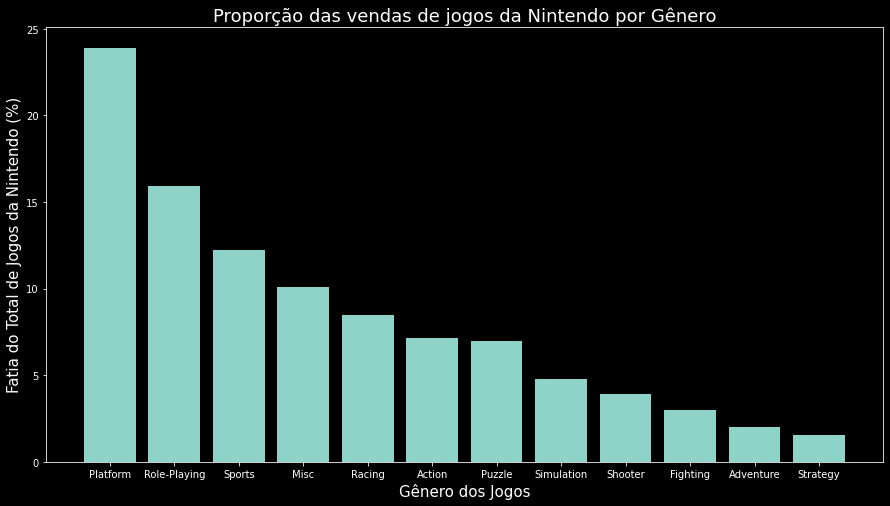

In [4]:
genre_sum = df_games_Nintendo.groupby(by='Genre').sum()
genre_sum = genre_sum.sort_values(by='Global_Sales',ascending=False)
porcentagens = (genre_sum['Global_Sales']*100)/(genre_sum['Global_Sales'].sum()) 

# Gráfico Barra Proporção

plt.style.use('dark_background')
plt.figure(figsize=(15,8))
plt.bar(genre_sum.index, porcentagens)
plt.title('Proporção das vendas de jogos da Nintendo por Gênero', fontsize=18)
plt.xlabel('Gênero dos Jogos', fontsize=15)
plt.ylabel('Fatia do Total de Jogos da Nintendo (%)', fontsize=15)
plt.show()

##### Crie uma visualização que mostre a proporção de quantidade de jogos por plataforma a partir do ano de 2015

In [5]:
df_games_2015 = df_games[df_games['Year'] >= 2015]
df_games_2015['Year'].unique()

array([2015., 2016., 2020., 2017.])

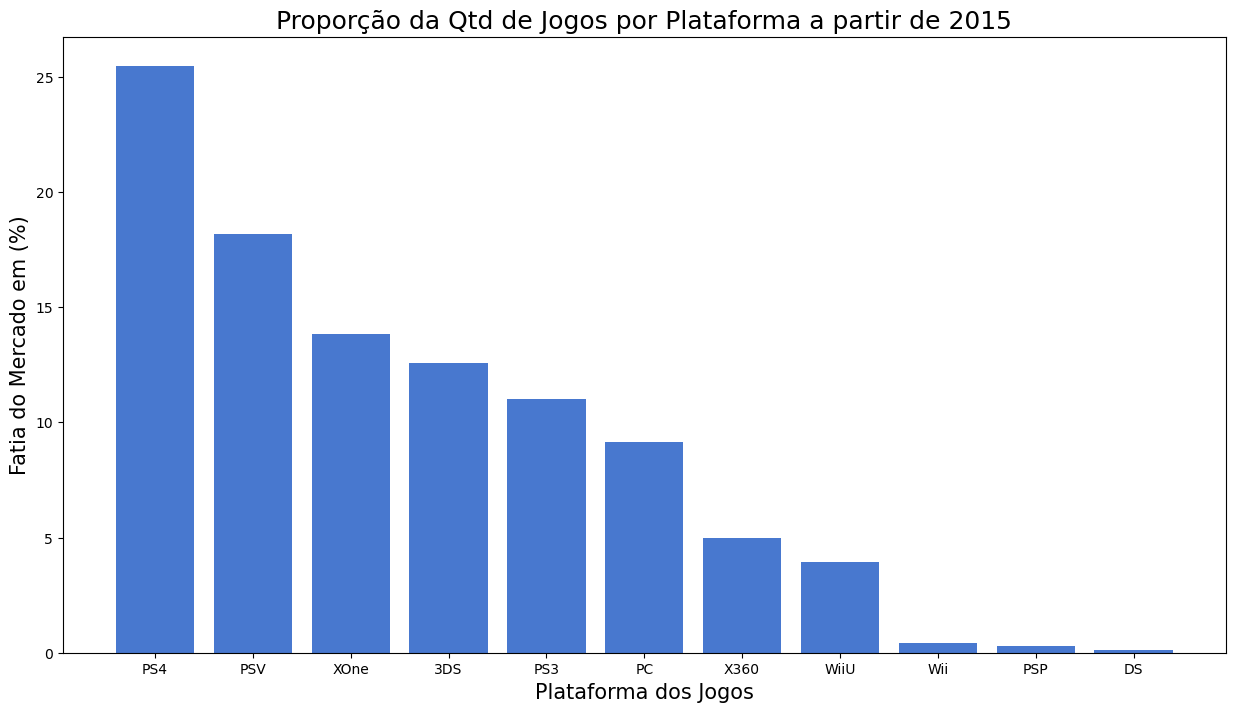

In [11]:
Platform_count = df_games_2015.groupby(by='Platform').count()
Platform_count = Platform_count.sort_values(by='Rank',ascending=False)
porcentagens_platform = (Platform_count['Rank']*100)/(Platform_count['Rank'].sum()) 
 

# Gráfico Barra Proporção

plt.style.use('seaborn-muted')
plt.figure(figsize=(15,8))
plt.bar(Platform_count.index, porcentagens_platform)
plt.title('Proporção da Qtd de Jogos por Plataforma a partir de 2015', fontsize=18)
plt.xlabel('Plataforma dos Jogos', fontsize=15)
plt.ylabel('Fatia do Mercado em (%)', fontsize=15)
plt.show()